### Práctica: Respuestas de un circuito eléctrico de segundo orden.

**Objetivo:** Modelar un circuito eléctrico de segundo orden mediante el análisis de mallas para obtener su función de transferencia. Simular la respuesta del sistema ante una entrada escalón, analizando y comparando los casos de respuesta subamortiguada, críticamente amortiguada y sobreamortiguada a través de la modificación de los parámetros del circuito y la ubicación de los polos del sistema.


---





#### Paso 1: Planteamiento del sistema.

Para nuestro análisis, utilizaremos un circuito RLC de dos mallas. La entrada será el voltaje de la fuente, $V_{in}(t)$, y la salida será el voltaje en la resistencia $R_2$, que denotaremos como $V_{out}(t)$.

![Diagrama del circuito eléctrico.](assets/images/P_2_02_Diagrama.png)

*Figura 1. Diagrama eléctrico del circuito.*

---





#### Paso 2: Obtención de la Función de Transferencia.

Realizaremos el análisis de mallas directamente en el dominio de Laplace, asumiendo condiciones iniciales iguales a cero. Las impedancias de los componentes son $R_1$, $R_2$, $sL$ y $\frac{1}{sC}$.

Aplicamos la Ley de Voltajes de Kirchhoff (LVK) a cada malla:

**Ecuación de la Malla 1:**
$$ V_{in}(s) = (R_1 + \frac{1}{sC})I_1(s) - \frac{1}{sC}I_2(s) \quad \dots (1) $$

**Ecuación de la Malla 2:**
$$ 0 = -\frac{1}{sC}I_1(s) + (R_2 + sL + \frac{1}{sC})I_2(s) \quad \dots (2) $$

La salida del sistema es $V_{out}(s) = R_2 I_2(s)$. Nuestro objetivo es encontrar la función de transferencia $G(s) = \frac{V_{out}(s)}{V_{in}(s)}$. 

Para ello, necesitamos resolver el sistema de ecuaciones para $I_2(s)$. Utilizando la regla de Cramer, obtenemos:
$$ I_2(s) = \frac{\begin{vmatrix} R_1 + \frac{1}{sC} & V_{in}(s) \\ -\frac{1}{sC} & 0 \end{vmatrix}}{\begin{vmatrix} R_1 + \frac{1}{sC} & -\frac{1}{sC} \\ -\frac{1}{sC} & R_2 + sL + \frac{1}{sC} \end{vmatrix}} = \frac{\frac{1}{sC}V_{in}(s)}{(R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2} $$

Desarrollando el denominador:
$$ (R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2$$
$$ = R_1R_2 + sL R_1 + \frac{R_1}{sC} + \frac{R_2}{sC} + \frac{L}{C} + \frac{1}{s^2 C^2} - \frac{1}{s^2 C^2}$$
$$ = sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC} $$

Sustituyendo el denominador en la expresión de $I_2(s)$:
$$ I_2(s) = \frac{\frac{1}{sC}V_{in}(s)}{sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC}} $$
$$ I_2(s) = \frac{V_{in}(s)}{sC (sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC})} $$
$$ I_2(s) = \frac{V_{in}(s)}{s^2LCR_1 + s(R_1R_2C+L) + (R_1+R_2)} $$

Como $V_{out}(s) = R_2 I_2(s)$, la función de transferencia final es:
$$ G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{R_2}{s^2(LCR_1) + s(L+R_1R_2C) + (R_1+R_2)} $$

El **polinomio característico** del sistema (el denominador) es:
$$ \Delta = s^2 (LCR_1) + s(L+R_1R_2C) + (R_1 + R_2) = 0 $$

Las raíces de este polinomio, que son los polos del sistema, determinan la naturaleza de la respuesta transitoria.


---





#### Paso 3: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{subamortiguada} = 4 \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta submortiguada**. Un sistema subamortiguado tiene un par de números complejos conjugados con partes reales negativas.


##### *Análisis de las raíces para el caso subamortiguado:*

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(4 \cdot 1 \cdot 2) + s(4 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 8 s^2 + 8s + 4 = 0 $$
$$ s^2 + s + \frac{1}{2} = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-1 \pm \sqrt{1^2 - 4 \cdot 1 \cdot \frac{1}{2}}}{2 \cdot 1} $$
$$ s = - \frac{1}{2} \pm \frac{\sqrt{-1}}{2} $$

Por lo que se obtiene:
$$ s = - \frac{1}{2} \pm \frac{1}{2}j $$

Como las raíces son complejos conjugados con parte real negativa, la respuesta es **subamortiguada**.





#### Paso 3.a) Crear la Función de Transferencia.





In [7]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_subamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_subamortiguado)





La Función de Transferencia es:

       2
---------------
8 s^2 + 8 s + 4



#### Paso 3.b) Visualizar el mapa de polos y ceros.






Las raíces de s (polos) son:
[-0.5+0.5j -0.5-0.5j]


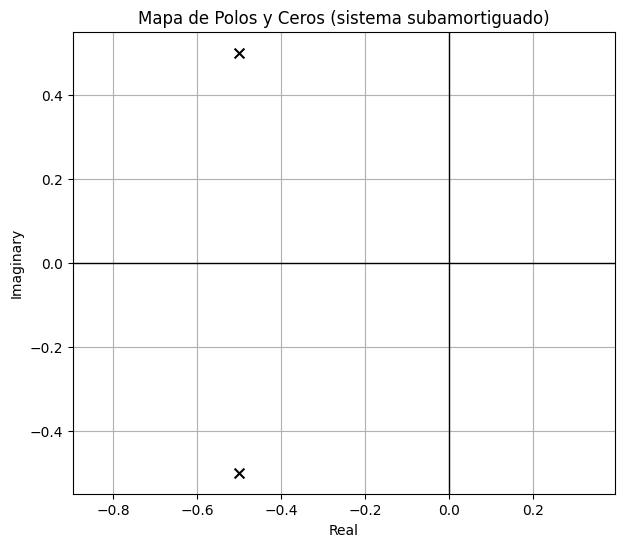

In [8]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_subamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_subamortiguado, title='Mapa de Polos y Ceros (sistema subamortiguado)')
plt.grid(True)
plt.show()





#### Paso 3.c) Graficar la respuesta del sistema.





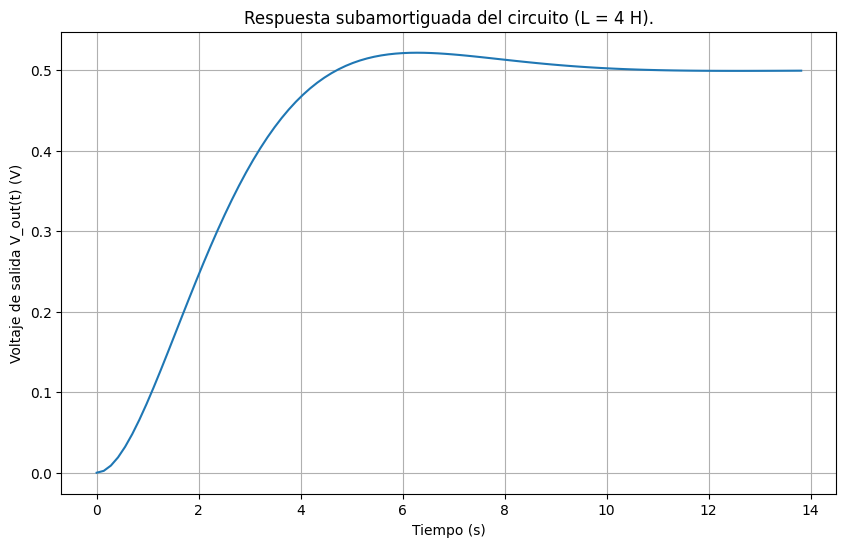

In [9]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_subamortiguado = ct.step_response(sistema_subamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_subamortiguado)
plt.title('Respuesta subamortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()





#### Ejercicio propuesto. Análisis de las respuestas críticamente amortiguada y sobreamortiguada.

Ahora que hemos analizado y simulado el caso subamortiguado, tu tarea es encontrar los valores de $L$ que producen las respuestas críticamente amortiguada y sobreamortiguada.

**Instrucciones:**

1.  **Respuesta Críticamente Amortiguada:**
    Recuerde que la ecuación característica del sistema es:
    $$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
    
    Manteniendo $R_1 = 2 \, \Omega$, $R_2 = 2 \, \Omega$ y $C = 1 \, F$, determina analíticamente 
    el valor de $L$ que hace que el discriminante del polinomio característico ($b^2-4ac$) sea igual a cero. 
    $$ \implies (L + R_1 R_2 C)^2 - 4 \cdot (LCR_1) \cdot (R_1 + R_2) = 0 $$

    Esto resultará en dos polos negativos, reales e iguales.
    * Muestra tu cálculo en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.
    
2.  **Respuesta Sobreamortiguada:**
    * Elige un valor de $L$ adecuado (valor propuesto con base en el análisis del valor para el caso críticamente amortiguado y el que se propuso al inicio para el caso subamortiguado).
    * Demuestra analíticamente que, con este nuevo valor de $L$, las raíces son dos números reales, distintos y negativos. Incluye este análisis en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.

3.  **Gráfica comparativa:**
    * En una celda final, crea un único script que grafique las tres respuestas (subamortiguada, críticamente amortiguada y sobreamortiguada) en la misma figura.
    * Usa `plt.legend()` para identificar claramente cada curva. Esto te permitirá visualizar directamente cómo el cambio en un solo elemento afecta la dinámica del sistema.

### 1.  **Respuesta Críticamente Amortiguada:**

---





#### Paso 1: Sustituir los valores de $R_1 = 2 \, \Omega$, $R_2 = 2 \, \Omega$ y $C = 1 \, F$ en la ecuación característica del sistema.

$$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$

$$ \implies \Delta = s^2 [L(1)(2)] + s[L + (2) (2) (1)] + [(2) + (2)] = 0 $$

$$ \implies \Delta = s^2 [L(2)] + s[L + (4)] + (4) = 0 $$

$$ \implies \Delta = s^2 (2L) + s(L + 4) + 4 = 0 $$

#### Paso 2: Obtener los valores de $a$, $b$ y $c$ para desarrollar la fórmula cuadrática y encontar los valores de $L$ que hacen que el discriminante del polinomio característico ($b^2-4ac$) sea igual a cero.

$$ a = 2L ; b = L + 4 ; c = 4  $$

$$ b^2 - 4 a c = 0 $$

$$ \implies (L + 4)^2 - 4 [(2L) (4)] = 0 $$

$$ \implies [(L)^2 + 2 (L) (4) + (4)^2] - 4 (8L) = 0 $$

$$ \implies [L^2 + 2 (4L) + 16] - 32L = 0 $$

$$ \implies (L^2 + 8L + 16) - (32L) = 0 $$

$$ \implies L^2 + 8L + 16 - 32L = 0 $$

$$ \implies L^2 - 24L + 16 = 0 $$

Resolviendo este polinomio cuadrático se obtiene:

$$ L_{1, 2} = 12 \pm 8 \sqrt{2} $$

$$ \implies L_1 = 12 + 8 \sqrt{2} $$

$$ \implies L_2 = 12 - 8 \sqrt{2} $$

#### Paso 3: Se toma cualquiera de los dos valores de $L$ ($L_1$ o $L_2$) y se sustituye en la ecuación característica del sistema para encontrar los polos.

$$ L = 12 + 8 \sqrt{2} $$

$$ \Delta = s^2 (2L) + s(L + 4) + 4 = 0 $$

$$ \implies s^2 [2 (12 + 8 \sqrt{2})] + s [(12 + 8 \sqrt{2}) + 4] + 4 = 0 $$

$$ \implies s^2 (24 + 16 \sqrt{2}) + s [(16 + 8 \sqrt{2})] + 4 = 0 $$



#### Paso 4: Obtener los valores de $a$, $b$ y $c$ para desarrollar la fórmula cuadrática y encontar los valores de $s$ (polos).

$$ a = 24 + 16 \sqrt{2} ; b = 16 + 8 \sqrt{2}; c = 4  $$

$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$

$$ \implies s_{1, 2} = \frac{-(16 + 8 \sqrt{2}) \pm \sqrt{(16 + 8 \sqrt{2})^2 - 4 \cdot (24 + 16 \sqrt{2}) \cdot (4)}}{2 \cdot (24 + 16 \sqrt{2})} $$

$$ s_{1, 2} = \frac{-(16 + 8 \sqrt{2}) \pm \sqrt{[(16)^2+2(16)(8\sqrt{2})+(8\sqrt{2})^2] - 4 \cdot (96 + 64 \sqrt{2})}}{48 + 32 \sqrt{2}} $$

$$ s_{1, 2} = \frac{-(16 + 8 \sqrt{2}) \pm \sqrt{[256+2(128\sqrt{2})+(64)(2)] - (384 + 256 \sqrt{2})}}{48 + 32 \sqrt{2}} $$

$$ s_{1, 2} = \frac{-(16 + 8 \sqrt{2}) \pm \sqrt{[256+256\sqrt{2}+128] - 384 - 256 \sqrt{2}}}{48 + 32 \sqrt{2}} $$

$$ s_{1, 2} = \frac{-(16 + 8 \sqrt{2}) \pm \sqrt{256+256\sqrt{2}+128 - 384 - 256 \sqrt{2}}}{48 + 32 \sqrt{2}} $$

$$ s_{1, 2} = \frac{-(16 + 8 \sqrt{2}) \pm \sqrt{0}}{48 + 32 \sqrt{2}} $$

$$ s_{1, 2} = \frac{-(16 + 8 \sqrt{2})}{48 + 32 \sqrt{2}} \pm \frac{\sqrt{0}}{48 + 32 \sqrt{2}} $$

$$ s_{1, 2} = -(\frac{2-\sqrt{2}}{2}) \pm \frac{0}{48 + 32 \sqrt{2}} $$

Por lo que se obtiene:

$$ s_{1, 2} = - 1 + \frac{\sqrt{2}}{2} $$

Como las raíces son negativas, reales e iguales, la respuesta es **críticamente amortiguada**.

#### Paso 5: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{críticamente amortiguada} = 12 + 8 \sqrt{2} \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta críticamente amortiguada**. Un sistema críticamente amortiguado tiene un par de polos reales e iguales en el **semiplano izquierdo** del plano complejo llamado **Plano s**.

#### Paso 5.a) Crear la Función de Transferencia.





In [4]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = (12+8* np.sqrt(2))      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_críticamente_amortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_críticamente_amortiguado)





La Función de Transferencia es:

           2
-----------------------
46.63 s^2 + 27.31 s + 4



#### Paso 5.b) Visualizar el mapa de polos y ceros.






Las raíces de s (polos) son:
[-0.29289322+0.j -0.29289321+0.j]


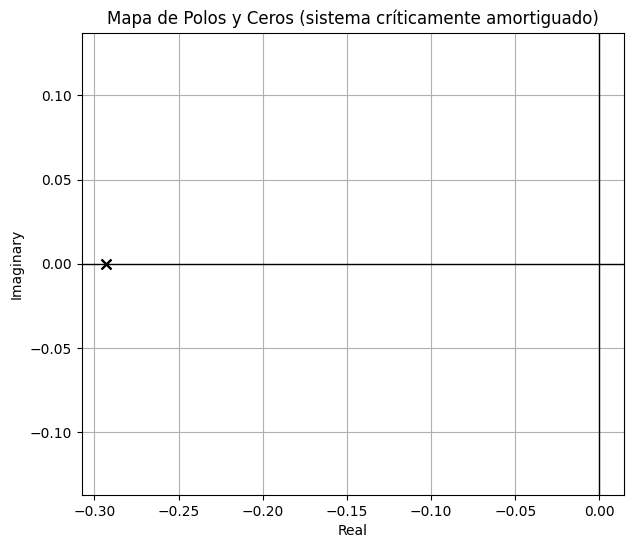

In [5]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema críticamente amortiguado, esperamos dos polos reales e iguales en el semiplano izquiero del plano complejo.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_críticamente_amortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_críticamente_amortiguado, title='Mapa de Polos y Ceros (sistema críticamente amortiguado)')
plt.grid(True)
plt.show()





#### Paso 5.c) Graficar la respuesta del sistema.





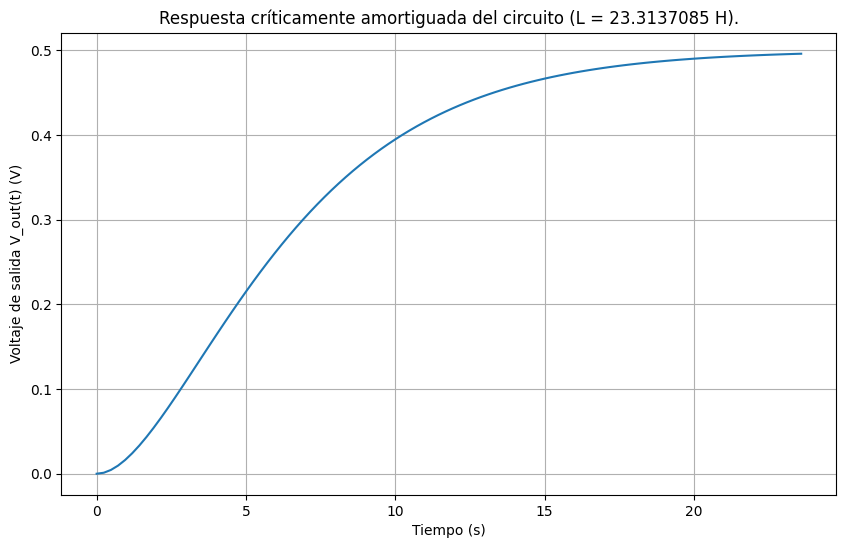

In [6]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_críticamente_amortiguado es el vector de la salida V_out(t).
t, vout_críticamente_amortiguado = ct.step_response(sistema_críticamente_amortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_críticamente_amortiguado)
plt.title('Respuesta críticamente amortiguada del circuito (L = 23.3137085 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()





### 2.  **Respuesta Sobreamortiguada:**

---




#### Paso 1: Para este caso, al haber obtenido anteriormente los valores de $L_1 = 12 + 8 \sqrt{2} = 23.3137085 \, F$ y $L_2 = 12 - 8 \sqrt{2} = 0.686291501 \, F$, se propone un valor de $L$ mayor que $L_1$ o menor que $L_2$. En lo particular propongo mi valor de $L = 24 \, F$.

#### Paso 2: Se sustiye el valor de $L$ propuesto en la ecuación característica del sistema.

$$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$

$$ \implies s^2 [(24)(1)(2)] + s[(24) + (2) (2) (1)] + [(2) + (2)] = 0 $$

$$ \implies s^2 (48) + s(24 +4) + (4) = 0 $$

$$ \implies 48 s^2 + 28 s + 4 = 0 $$

#### Paso 3: Obtener los valores de $a$, $b$ y $c$ para desarrollar la fórmula cuadrática y encontar los valores de $s$ (polos).

$$ a = 48 ; b = 28 ; c = 4  $$

$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$

$$ \implies s_{1, 2} = \frac{-(28) \pm \sqrt{(28)^2 - 4 \cdot (48) \cdot (4)}}{2 \cdot (48)} $$

$$ s_{1, 2} = \frac{-28 \pm \sqrt{784 - 4 \cdot (192)}}{96} $$

$$ s_{1, 2} = \frac{-28 \pm \sqrt{784 - 768}}{96} $$

$$ s_{1, 2} = \frac{-28 \pm \sqrt{16}}{96} $$

$$ s_{1, 2} = \frac{-28 \pm 4}{96} $$

$$ s_{1, 2} = - \frac{28}{96} \pm \frac{4}{96} $$

$$ s_{1, 2} = - \frac{7}{24} \pm \frac{1}{24} $$

Por lo que se obtiene:

$$  s_1 = - \frac{6}{24} = - \frac{1}{4} $$

$$  s_2 = - \frac{8}{24} = - \frac{1}{3} $$

Como las raíces son negativas, reales y distintas, la respuesta es **sobreamortiguada**.

#### Paso 4: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{sobreamortiguada} = 24 \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta sobreamortiguada**. Un sistema sobreamortiguado tiene un par de polos reales y distintos en el **semiplano izquierdo** del plano complejo llamado **Plano s**.

#### Paso 4.a) Crear la Función de Transferencia.





In [7]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SOBREAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 24      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_sobreamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_sobreamortiguado)





La Función de Transferencia es:

        2
-----------------
48 s^2 + 28 s + 4



#### Paso 4.b) Visualizar el mapa de polos y ceros.





Las raíces de s (polos) son:
[-0.33333333+0.j -0.25      +0.j]


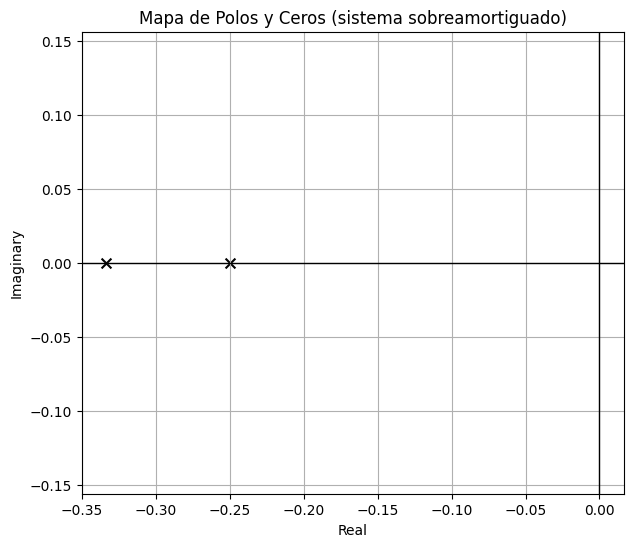

In [9]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema sobreamortiguado, esperamos dos polos reales y distintos es en el semiplano izquiero del plano complejo.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_sobreamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_sobreamortiguado, title='Mapa de Polos y Ceros (sistema sobreamortiguado)')
plt.grid(True)
plt.show()




#### Paso 4.c) Graficar la respuesta del sistema.




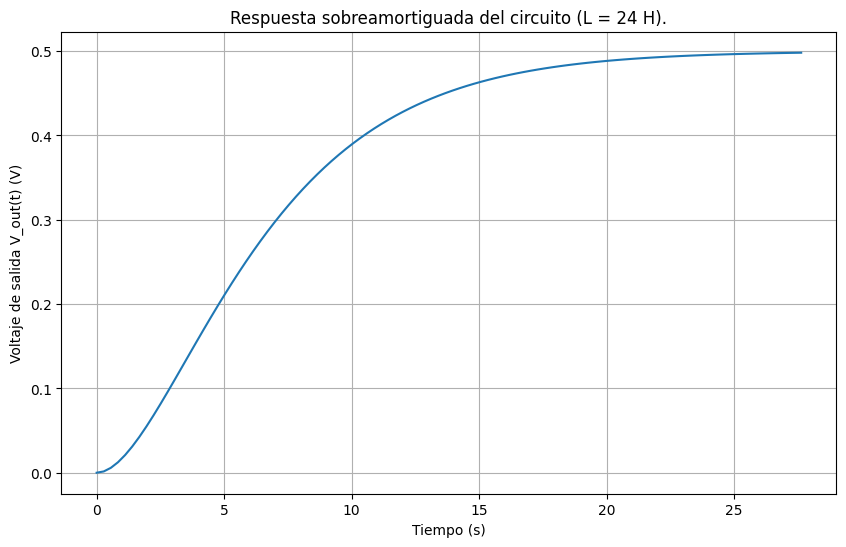

In [10]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_sobreamortiguado es el vector de la salida V_out(t).
t, vout_sobreamortiguado = ct.step_response(sistema_sobreamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_sobreamortiguado)
plt.title('Respuesta sobreamortiguada del circuito (L = 24 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()





### 3.  **Gráfica comparativa:**

---





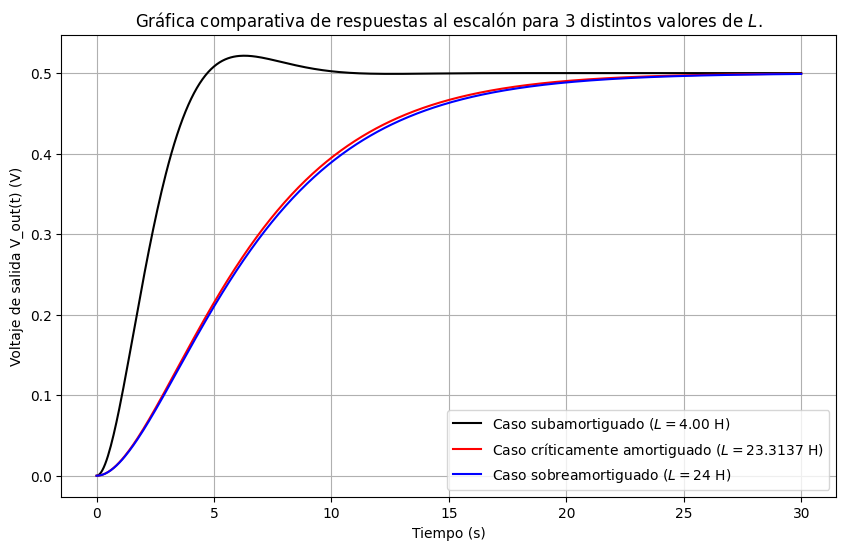

In [27]:
import numpy as np
import control.matlab as ctrl
import matplotlib.pyplot as plt

# --- Parámetros Constantes del Circuito ---
R1 = 2  # Ohmios
R2 = 2  # Ohmios
C = 1   # Faradios
T_final = 30 # Tiempo de simulación (s)
T = np.linspace(0, T_final, 500)

# --- Valores de L para cada caso ---
L_sub = 4 # Valor que produce Subamortiguamiento (L=1 H)
L_critico = 12 + 8 * np.sqrt(2) # Valor que produce Amortiguamiento Crítico (L=23.3137085 H)
L_sobre = 24 # Valor que produce Sobreamortiguamiento (L=24 H)

# --- Función para obtener la Función de Transferencia G(s) ---
def get_transfer_function(L_val):
    # Denominador: s^2(LCR1) + s(L + R1R2C) + (R1 + R2)
    a = L_val * C * R1
    b = L_val + R1 * R2 * C
    c = R1 + R2
    
    den = [a, b, c]
    num = [R2] # Asumiendo que la salida es V_C(s)
    
    return ctrl.tf(num, den)

# 1. Caso Subamortiguado
G_sub = get_transfer_function(L_sub)
y_sub, t_sub = ctrl.step(G_sub, T)

# 2. Caso Críticamente Amortiguado
G_critico = get_transfer_function(L_critico)
y_critico, t_critico = ctrl.step(G_critico, T)

# 3. Caso Sobreamortiguado
G_sobre = get_transfer_function(L_sobre)
y_sobre, t_sobre = ctrl.step(G_sobre, T)


# --- Graficación en una Sola Figura ---
plt.figure(figsize=(10, 6))

# Trazado de las tres respuestas
plt.plot(t_sub, y_sub, 
         label=f'Caso subamortiguado ($L= {L_sub:.2f}$ H)', 
         linestyle='-', color='black')
         
plt.plot(t_critico, y_critico, 
         label=f'Caso críticamente amortiguado ($L = {L_critico:.4f}$ H)', 
         linestyle='-', color='red')
         
plt.plot(t_sobre, y_sobre, 
         label=f'Caso sobreamortiguado ($L = {L_sobre:.0f}$ H)', 
         linestyle='-', color='blue')

# Configuración de la gráfica
plt.title('Gráfica comparativa de respuestas al escalón para 3 distintos valores de $L$.')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.legend(loc='lower right') # Muestra la leyenda para identificar las curvas

plt.show()